In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.stats.multitest as sm
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from scipy.stats import wilcoxon



In [2]:

data = pd.read_csv('/content/data_from_GC-MS.csv')

In [5]:

data.head()

,data_from_GC-MS,name,Blank1,Blank2,Blank3,Mito_atp4_1,Mito_atp4_2,Mito_atp4_3,Mito_sdh2_1,Mito_sdh2_2,...,Cyto_sdh2_1,Cyto_sdh2_2,Cyto_sdh2_3,Mito_WT_1,Mito_WT_2,Mito_WT_3,Cyto_WT_1,Cyto_WT_2,Cyto_WT_3,last_col
0,SC26_285mz_10.3051min,Blank1/MET1.ELU,1372.0,1388.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,SC40_147mz_10.4225min,Blank1/MET1.ELU,13148.0,6588.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2,SC64_204mz_10.6205min,Blank1/MET1.ELU,132433.0,0.0,97173.0,115458.0,0.0,118294.0,175508.0,0.0,...,126849.0,96241.0,178638.0,131774.0,109091.0,109051.0,127581.0,95897.0,107141.0,2.0
3,SC133_113mz_11.201min,Blank1/MET1.ELU,5597.0,0.0,4366.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
4,SC854_211mz_17.2525min,Blank1/MET1.ELU,1019.0,595.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [6]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data_from_GC-MS  3359 non-null   object 
 1   name             3359 non-null   object 
 2   Blank1           3359 non-null   float64
 3   Blank2           3359 non-null   float64
 4   Blank3           3359 non-null   float64
 5   Mito_atp4_1      3359 non-null   float64
 6   Mito_atp4_2      3359 non-null   float64
 7   Mito_atp4_3      3359 non-null   float64
 8   Mito_sdh2_1      3359 non-null   float64
 9   Mito_sdh2_2      3359 non-null   float64
 10  Mito_sdh2_3      3359 non-null   float64
 11  Cyto_atp4_1      3359 non-null   float64
 12  Cyto_atp4_2      3359 non-null   float64
 13  Cyto_atp4_3      3359 non-null   float64
 14  Cyto_sdh2_1      3359 non-null   float64
 15  Cyto_sdh2_2      3359 non-null   float64
 16  Cyto_sdh2_3      3359 non-null   float64
 17  Mito_WT_1     

In [10]:



numeric_columns = data.columns[2:]  # Exclude 'data_from_GC-MS' and 'name' columns

# Normalizing using StandardScaler
scaler = StandardScaler()
normalized_data = data.copy()
normalized_data[numeric_columns] = scaler.fit_transform(normalized_data[numeric_columns])

# Log-transform the data
log_data = normalized_data.copy()
log_data.iloc[:, 2:] = log_data.iloc[:, 2:].apply(lambda x: np.log1p(x))

In [15]:

# Extract and preprocess data
compound_ids = data.iloc[:, 0:2]
data_values = data.iloc[:, 2:]

# Normalize the data (Total Ion Current normalization)
normalized_data = data_values.div(data_values.sum(axis=0), axis=1)

# Log-transform the data
log_data = np.log1p(normalized_data)

In [29]:

compound_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data_from_GC-MS  3359 non-null   object
 1   name             3359 non-null   object
dtypes: object(2)
memory usage: 52.6+ KB


In [84]:
log_data

,Blank1,Blank2,Blank3,Mito_atp4_1,Mito_atp4_2,Mito_atp4_3,Mito_sdh2_1,Mito_sdh2_2,Mito_sdh2_3,Cyto_atp4_1,...,Mito_WT_2,Mito_WT_3,Cyto_WT_1,Cyto_WT_2,Cyto_WT_3,last_col,PC1,PC2,PCA1,PCA2
0,0.000006,0.000007,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001275,0.000171,-0.001803,0.000241
1,0.000058,0.000032,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000004,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000321,-0.001256,0.000204,-0.001776,0.000289
2,0.000589,0.000000,0.000484,0.000111,0.0,0.000136,0.000198,0.0,0.000116,0.000016,...,0.000072,0.0001,0.000017,0.000015,0.000017,0.000043,-0.000791,0.000611,-0.001119,0.000865
3,0.000025,0.000000,0.000022,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001267,0.000186,-0.001792,0.000263
4,0.000005,0.000003,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001277,0.000168,-0.001805,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3354,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3355,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3356,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000342,-0.001278,0.000165,-0.001808,0.000233
3357,0.000000,0.000000,0.000000,0.000007,0.0,0.000000,0.000009,0.0,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000321,-0.001274,0.000165,-0.001802,0.000234


In [68]:

# Defining comparisons on column names
comparisons = [
    ('Mito_atp4_1', 'Mito_WT_1'),
    ('Mito_atp4_2', 'Mito_WT_2'),
    ('Mito_atp4_3', 'Mito_WT_3'),
    ('Mito_sdh2_1', 'Mito_WT_1'),
    ('Mito_sdh2_2', 'Mito_WT_2'),
    ('Mito_sdh2_3', 'Mito_WT_3'),
    ('Cyto_atp4_1', 'Cyto_WT_1'),
    ('Cyto_atp4_2', 'Cyto_WT_2'),
    ('Cyto_atp4_3', 'Cyto_WT_3'),
    ('Cyto_sdh2_1', 'Cyto_WT_1'),
    ('Cyto_sdh2_2', 'Cyto_WT_2'),
    ('Cyto_sdh2_3', 'Cyto_WT_3')
]

# differential analysis
all_results_wilcoxon = pd.DataFrame(columns=['Compound_ID', 'p-value', 'Comparison'])
for comp in comparisons:
    group1_values = log_data[comp[0]].values
    group2_values = log_data[comp[1]].values
    _, p_val = wilcoxon(group1_values, group2_values)
    results = pd.DataFrame({'Compound_ID': compound_ids['data_from_GC-MS'], 'p-value': p_val, 'Comparison': f"{comp[0]} vs {comp[1]}"})
    all_results_wilcoxon = pd.concat([all_results_wilcoxon, results])

# Adjust p-values for multiple testing (Benjamini-Hochberg)
all_results_wilcoxon['adjusted_p-value'] = sm.multipletests(all_results_wilcoxon['p-value'], method='fdr_bh')[1]

# Filter significant results
significant_results_wilcoxon = all_results_wilcoxon[all_results_wilcoxon['adjusted_p-value'] < 0.05]

# Get the compound IDs of significant results from Wilcoxon test
significant_compounds_wilcoxon = significant_results_wilcoxon['Compound_ID']


# Output significant results
print("Significant results using Wilcoxon signed-rank test:")
significant_results_wilcoxon


Significant results using Wilcoxon signed-rank test:


,Compound_ID,p-value,Comparison,adjusted_p-value
0,SC26_285mz_10.3051min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
1,SC40_147mz_10.4225min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
2,SC64_204mz_10.6205min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
3,SC133_113mz_11.201min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
4,SC854_211mz_17.2525min,0.009456,Mito_atp4_3 vs Mito_WT_3,0.014184
...,...,...,...,...
3354,SC3805_129mz_42.0007min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3355,SC3838_73mz_42.2826min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3356,SC3846_309mz_42.3539min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823
3357,SC4191_159mz_45.2421min,0.000412,Cyto_sdh2_3 vs Cyto_WT_3,0.000823


In [96]:
significant_compounds

0         SC26_285mz_10.3051min
1         SC40_147mz_10.4225min
2         SC64_204mz_10.6205min
3         SC133_113mz_11.201min
4        SC854_211mz_17.2525min
                 ...           
3354    SC3805_129mz_42.0007min
3355     SC3838_73mz_42.2826min
3356    SC3846_309mz_42.3539min
3357    SC4191_159mz_45.2421min
3358     SC4279_73mz_45.9828min
Name: Compound_ID, Length: 26872, dtype: object

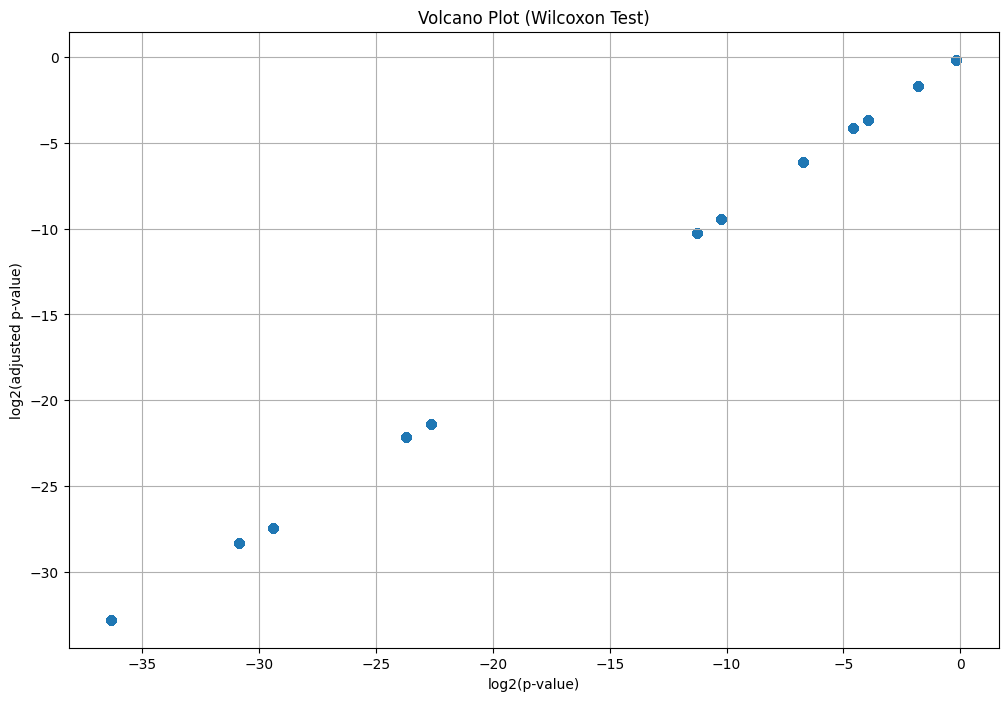

In [99]:

#visual
plt.figure(figsize=(12, 8))
plt.scatter(np.log2(all_results_wilcoxon['p-value']), np.log2(all_results_wilcoxon['adjusted_p-value']))
plt.xlabel('log2(p-value)')
plt.ylabel('log2(adjusted p-value)')
plt.title('Volcano Plot (Wilcoxon Test)')
plt.grid(True)
plt.show()


In [100]:

#op differentially expressed compounds

top_n = 10
top_significant_results_wilcoxon = significant_results_wilcoxon.sort_values('adjusted_p-value').head(top_n)
print(f"\nTop {top_n} differentially expressed compounds (Wilcoxon test):")
print(top_significant_results_wilcoxon.to_markdown(index=False, numalign="left", stralign="left"))




Top 10 differentially expressed compounds (Wilcoxon test):
| Compound_ID             | p-value     | Comparison               | adjusted_p-value   |
|:------------------------|:------------|:-------------------------|:-------------------|
| SC2788_158mz_33.4718min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3583_341mz_40.1416min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3657_174mz_40.7624min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC3963_578mz_43.3318min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4525_324mz_48.0437min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4539_324mz_48.1611min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4652_305mz_49.1116min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC4684_315mz_49.3767min | 1.13683e-11 | Cyto_atp4_3 vs Cyto_WT_3 | 1.3642e-10         |
| SC5417_365mz_55.5272min | 1.13683e-11 

In [110]:
log_data_columns = list(log_data.columns)
print(log_data_columns)

['Blank1', 'Blank2', 'Blank3', 'Mito_atp4_1', 'Mito_atp4_2', 'Mito_atp4_3', 'Mito_sdh2_1', 'Mito_sdh2_2', 'Mito_sdh2_3', 'Cyto_atp4_1', 'Cyto_atp4_2', 'Cyto_atp4_3', 'Cyto_sdh2_1', 'Cyto_sdh2_2', 'Cyto_sdh2_3', 'Mito_WT_1', 'Mito_WT_2', 'Mito_WT_3', 'Cyto_WT_1', 'Cyto_WT_2', 'Cyto_WT_3', 'last_col', 'PC1', 'PC2', 'PCA1', 'PCA2']


In [113]:
significant_compounds_wilcoxon

0         SC26_285mz_10.3051min
1         SC40_147mz_10.4225min
2         SC64_204mz_10.6205min
3         SC133_113mz_11.201min
4        SC854_211mz_17.2525min
                 ...           
3354    SC3805_129mz_42.0007min
3355     SC3838_73mz_42.2826min
3356    SC3846_309mz_42.3539min
3357    SC4191_159mz_45.2421min
3358     SC4279_73mz_45.9828min
Name: Compound_ID, Length: 26872, dtype: object

<ipython-input-82-daf4cc85920e>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=principal_df, x='PC1', y='PC2', palette='viridis')


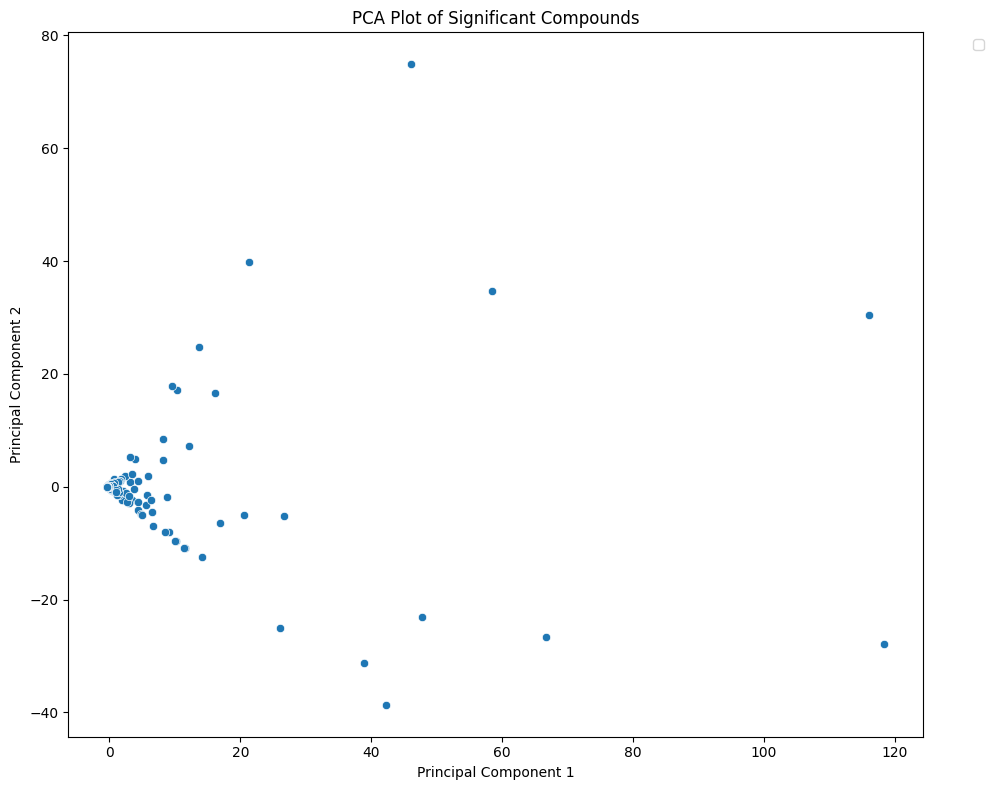

In [82]:

# features (compound abundances)
features = log_data.iloc[:, 1:]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
#plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', palette='viridis')
plt.title('PCA Plot of Significant Compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
